# **Face-Recognition-with-Deep-Neural-Net**



### **1. LeNet5**

### **2. Alexnet**

### **3. VGG16**




### Note: used paperspace GPU to run the models

## Importing Libraries

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# Here is where we import the matplotlib as plt. Henceforth, it is plt. 
from keras.initializers import glorot_uniform

import tensorflow as tf
# We run with Tensforflow. So, import it folks. 
import math
import h5py

import numpy as np
# We got to import numpy as well. 
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

## 1 - Emotion Tracking

* A nearby community health clinic is helping the local residents monitor their mental health.  
* As part of their study, they are asking volunteers to record their emotions throughout the day.
* To help the participants more easily track their emotions, you are asked to create an app that will classify their emotions based on some pictures that the volunteers will take of their facial expressions.
* As a proof-of-concept, you first train your model to detect if someone's emotion is classified as "happy" or "not happy."

To build and train this model, you have gathered pictures of some volunteers in a nearby neighborhood. The dataset is labeled.
<img src="images/face_images.png" style="width:550px;height:250px;">

Run the following code to normalize the dataset and learn about its shapes.

## Loading Dataset

In [2]:

def load_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
  
  
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

## Step-1 : Load Emotion detection dataset

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.



rows, cols = 64, 64
# See the architecture, first set 28 x 28 is the number of rows and columns!! 

x_train = X_train_orig.reshape(X_train_orig.shape[0], rows, cols, 3)
x_test = X_test_orig.reshape(X_test_orig.shape[0], rows, cols, 3)
    
input_shape = (64, 64, 3)

# Here, we normalize it. 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
 
# one-hot encode the labels
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 6)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 6)


**Details of the "Face" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

## Step 2 : Build Model

## **1. LeNet 5**

In [4]:
# GRADED FUNCTION: HappyModel

def build_lenet(input_shape):
  # sequentail API
  model = tf.keras.Sequential()
  # Convolution #1. Filters as we know, is 6. Filter size is 5 x 5, tanh is the activation function. 28 x 28 is the dimension. 
  model.add(tf.keras.layers.Conv2D(filters=6,
                                   kernel_size=(37, 37),  # increased the kernal size to adjust the input shape to 28 x 28
                                   strides=(1, 1),
                                   activation='tanh', kernel_initializer=glorot_uniform(seed=0),
                                   input_shape=input_shape))
    
  # SubSampling #1. Input = 28x28x6. Output = 14x14x6. SubSampling is simply Average Pooling so we use avg_pool
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2),
                                             strides=(2, 2)))
    
  # Convolution #2. Input = 14x14x6. Output = 10x10x16 conv2d
  model.add(tf.keras.layers.Conv2D(filters=16,
                                   kernel_size=(5, 5),
                                   strides=(1, 1),kernel_initializer=glorot_uniform(seed=0),
                                   activation='tanh'))
    
  # SubSampling #2. Input = 28x28x6. Output = 14x14x6. SubSampling is simply Average Pooling so we use avg_pool
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

  model.add(tf.keras.layers.Conv2D(filters=120,
                                   kernel_size=(5, 5),
                                   strides=(1, 1),kernel_initializer=glorot_uniform(seed=0),
                                   activation='tanh'))
    
  model.add(tf.keras.layers.Flatten())
  # We must flatten for the further steps to happen. 
  # It is the process of converting all the resultant 2D arrays as single long continuous linear vector



  model.add(tf.keras.layers.Flatten())
  # Flattening here. It is the process of converting all the resultant 2D arrays as single long continuous linear vector  

  model.add(tf.keras.layers.Dense(units=84, activation='tanh'))
  #Fully Connected #2. Input = 120. Output = 84

  # output layer
  model.add(tf.keras.layers.Dense(units=6, activation='softmax')) # classes=6
  # Final, output and activation through softmax. 
  
  # complie the model
  model.compile(loss='categorical_crossentropy',optimizer='SGD',
              metrics=['accuracy'])
 
  return model
 

In [5]:
input_shape=(64,64,3)  # input shape

In [6]:
lenet = build_lenet(input_shape)

### Step 3: Fit/Train the model



In [11]:
epochs = 20
history = lenet.fit(x_train, Y_train,
                           epochs=epochs,
                           batch_size=16,
                           verbose=1)
loss, acc = lenet.evaluate(x_test, Y_test)
print('ACCURACY: ', acc)

Epoch 1/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0603 - accuracy: 0.9833
Epoch 2/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0552 - accuracy: 0.9867
Epoch 3/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0482 - accuracy: 0.9867
Epoch 4/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0606 - accuracy: 0.9767
Epoch 5/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0555 - accuracy: 0.9783
Epoch 6/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0531 - accuracy: 0.9900
Epoch 7/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0495 - accuracy: 0.9883
Epoch 8/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0369 - accuracy: 0.9917
Epoch 9/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0490 - accuracy: 0.9817
Epoch 10/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0587 - accuracy: 0.9783
Epoch 11/20
38/38 [

## Step 4: evaluate model  


In [12]:
preds = lenet.evaluate(x_test, Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 0s 6ms/step - loss: 0.3789 - accuracy: 0.9333

Loss = 0.37889236211776733
Test Accuracy = 0.9333333373069763


## LeNet model test accuracy is 93.33 %

## Step-5: Prediction

Predicted label:  0


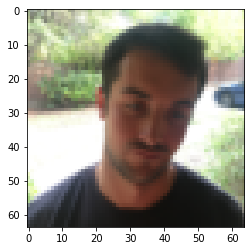

In [13]:
image_index = 72
plt.imshow(x_test[image_index].reshape(64, 64,3),cmap='Greys')

pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 3))
print("Predicted label: ",pred.argmax())

## 6 - Test with your own image (Optional)



Input image shape: (1, 64, 64, 3)
class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = 
[[9.9978381e-01 9.8367440e-05 3.6844373e-05 2.5682348e-05 1.7400182e-05
  3.7902479e-05]]


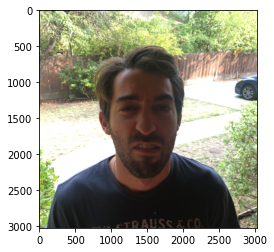

In [32]:

import imageio

img_path = 'my_image.jpg'
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0
print('Input image shape:', x.shape)
my_image = imageio.imread(img_path)
imshow(my_image)
print("class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ")
print(lenet.predict(x))

## Step-7 : Model Summary

In [14]:

lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         24648     
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0

In [64]:
import pydot
plot_model(lenet, to_file='HappyModel_lenet.png')
SVG(model_to_dot(lenet).create(prog='dot', format='svg'))

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


AttributeError: 'NoneType' object has no attribute 'create'

# Model 2 - Alexnet



## Build model

In [24]:
def alexnet(input_shape_):
  # sequentail API


    model = tf.keras.Sequential() 
    #X_input = Input(input_shape_)
    
    # Zero-Padding

    model.add(tf.keras.layers.ZeroPadding2D(padding=(83, 83)))
    
    # Stage 1
    model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu',kernel_initializer = glorot_uniform(seed=0), input_shape=input_shape_)),
    model.add(tf.keras.layers.BatchNormalization()),
    model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))),
    # stage 2
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1),kernel_initializer = glorot_uniform(seed=0), activation='relu', padding="same")),
    model.add(tf.keras.layers.BatchNormalization()),
    model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))),
    #stage 3
    model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', kernel_initializer = glorot_uniform(seed=0),padding="same")),
    model.add(tf.keras.layers.BatchNormalization()),
    #stage 4
    model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1),kernel_initializer = glorot_uniform(seed=0), activation='relu', padding="same")),
    model.add(tf.keras.layers.BatchNormalization()),
    #stage 5
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1),kernel_initializer = glorot_uniform(seed=0), activation='relu', padding="same")),
    model.add(tf.keras.layers.BatchNormalization()),
    model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))),
    #stage 6 Flattening
    model.add(tf.keras.layers.Flatten()),
    # fully connected layer
    model.add(tf.keras.layers.Dense(4096, activation='relu')),
    model.add(tf.keras.layers.Dropout(0.5)),
    model.add(tf.keras.layers.Dense(4096, activation='relu')),
    model.add(tf.keras.layers.Dropout(0.5)),
    # final output layer
    model.add(tf.keras.layers.Dense(6, activation='softmax')) # classes =6
    # compile
    model.compile(loss='categorical_crossentropy',optimizer='SGD',
              metrics=['accuracy'])
    return model

In [25]:

alexnet = alexnet(input_shape_=(64,64,3))

## Fit/train the model

In [28]:
epochs = 40
history1 = alexnet.fit(x_train, Y_train,
                           epochs=epochs,
                           batch_size=16,
                           verbose=1)
loss, acc = alexnet.evaluate(x_test, Y_test)
print('ACCURACY: ', acc)

Epoch 1/40
38/38 [==============================] - 2s 50ms/step - loss: 0.2222 - accuracy: 0.9067
Epoch 2/40
38/38 [==============================] - 2s 51ms/step - loss: 0.3157 - accuracy: 0.8850
Epoch 3/40
38/38 [==============================] - 2s 51ms/step - loss: 0.2081 - accuracy: 0.9183
Epoch 4/40
38/38 [==============================] - 2s 51ms/step - loss: 0.2560 - accuracy: 0.8850
Epoch 5/40
38/38 [==============================] - 2s 51ms/step - loss: 0.1693 - accuracy: 0.9317
Epoch 6/40
38/38 [==============================] - 2s 51ms/step - loss: 0.2972 - accuracy: 0.8983
Epoch 7/40
38/38 [==============================] - 2s 51ms/step - loss: 0.2185 - accuracy: 0.9150
Epoch 8/40
38/38 [==============================] - 2s 51ms/step - loss: 0.2087 - accuracy: 0.9100
Epoch 9/40
38/38 [==============================] - 2s 50ms/step - loss: 0.2231 - accuracy: 0.9167
Epoch 10/40
38/38 [==============================] - 2s 51ms/step - loss: 0.2834 - accuracy: 0.8867
Epoch 11/

## Evaluate the model

In [29]:
preds = alexnet.evaluate(x_test, Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 0s 26ms/step - loss: 0.1729 - accuracy: 0.9333

Loss = 0.1728716343641281
Test Accuracy = 0.9333333373069763


## Alexnet model test accuracy 93.33%

## Predictions

Predicted label:  0


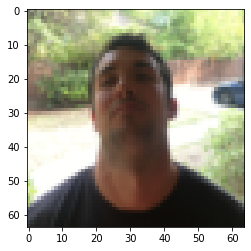

In [30]:
image_index = 50
plt.imshow(x_test[image_index].reshape(64, 64,3),cmap='Greys')

pred = alexnet.predict(x_test[image_index].reshape(1, rows, cols, 3))
print("Predicted label: ",pred.argmax())

Input image shape: (1, 64, 64, 3)
class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = 
[[9.9994504e-01 5.4935404e-05 1.5106377e-10 1.2717764e-10 9.4397622e-11
  4.1425452e-12]]


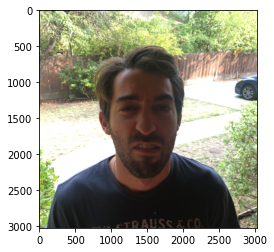

In [34]:

import imageio

img_path = 'my_image.jpg'
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0
print('Input image shape:', x.shape)
my_image = imageio.imread(img_path)
imshow(my_image)
print("class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ")
print(alexnet.predict(x))

## Model Summary

In [35]:
alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 230, 230, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)      

# **Model-3 : VGG16**



## Build VGG16 model

In [78]:

def VGG16(input_shape_):
  # sequentail API


  model = tf.keras.Sequential() 
    #X_input = Input(input_shape_)
  # zero-padding layer
  model.add(tf.keras.layers.ZeroPadding2D(padding=(80, 80)))
  # stage 1
  model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same",kernel_initializer = glorot_uniform(seed=0), activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",kernel_initializer = glorot_uniform(seed=0), activation="relu"))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #stage 2
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same",kernel_initializer = glorot_uniform(seed=0), activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same",kernel_initializer = glorot_uniform(seed=0), activation="relu"))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
  # stage 3
  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same",kernel_initializer = glorot_uniform(seed=0), activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same",kernel_initializer = glorot_uniform(seed=0), activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same",kernel_initializer = glorot_uniform(seed=0), activation="relu"))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
  # stage 4
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same",kernel_initializer = glorot_uniform(seed=0), activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same",kernel_initializer = glorot_uniform(seed=0), activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same",kernel_initializer = glorot_uniform(seed=0), activation="relu"))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
  # stage 5
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same",kernel_initializer = glorot_uniform(seed=0), activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same",kernel_initializer = glorot_uniform(seed=0), activation="relu"))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same",kernel_initializer = glorot_uniform(seed=0), activation="relu"))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
  # Flattening
  model.add(tf.keras.layers.Flatten())
  # Fully connected layer
  model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
  model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
  # final output layer
  model.add(tf.keras.layers.Dense(units=6, activation="softmax"))
  # model compile
  model.compile(loss='categorical_crossentropy',optimizer='SGD',
              metrics=['accuracy'])
  return model

In [79]:
VGG16 = VGG16(input_shape_=(64,64,3))

## Fit/Train the model

In [80]:
epochs = 10
history2 = VGG16.fit(x_train, Y_train,
                           epochs=epochs,
                           batch_size=16,
                           verbose=1)

Epoch 1/10
38/38 [==============================] - 17s 415ms/step - loss: 1.6972 - accuracy: 0.4747
Epoch 2/10
38/38 [==============================] - 16s 414ms/step - loss: 0.9104 - accuracy: 0.4900
Epoch 3/10
38/38 [==============================] - 16s 414ms/step - loss: 0.7542 - accuracy: 0.4896
Epoch 4/10
38/38 [==============================] - 16s 415ms/step - loss: 0.7036 - accuracy: 0.5322
Epoch 5/10
38/38 [==============================] - 16s 415ms/step - loss: 0.7032 - accuracy: 0.5617
Epoch 6/10
38/38 [==============================] - 16s 415ms/step - loss: 0.7233 - accuracy: 0.4778
Epoch 7/10
38/38 [==============================] - 16s 416ms/step - loss: 0.7405 - accuracy: 0.4629
Epoch 8/10
38/38 [==============================] - 16s 416ms/step - loss: 0.7095 - accuracy: 0.4639
Epoch 9/10
38/38 [==============================] - 16s 416ms/step - loss: 0.7648 - accuracy: 0.4904
Epoch 10/10
38/38 [==============================] - 16s 416ms/step - loss: 0.7103 - accura

## Evaluate the model

In [87]:
preds = VGG16.evaluate(x_test, Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 1s 213ms/step - loss: 0.6933 - accuracy: 0.5600

Loss = 0.6932789087295532
Test Accuracy = 0.5600000023841858


## VGG model test accuracy 56%

## Prediction

Predicted label:  1


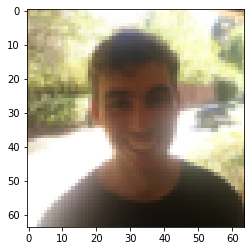

In [84]:
image_index = 2
plt.imshow(x_test[image_index].reshape(64, 64,3),cmap='Greys')

pred = VGG16.predict(x_test[image_index].reshape(1, rows, cols, 3))
print("Predicted label: ",pred.argmax())

Input image shape: (1, 64, 64, 3)
class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = 
[[0.402655   0.5925786  0.00116129 0.00123371 0.00117262 0.00119878]]


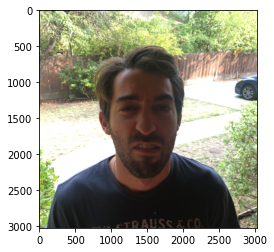

In [85]:
import imageio

img_path = 'my_image.jpg'
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0
print('Input image shape:', x.shape)
my_image = imageio.imread(img_path)
imshow(my_image)
print("class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ")
print(VGG16.predict(x))

## Model Summary

In [86]:
VGG16.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_2 (ZeroPaddin (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 128)      

# Conclusion

### 1. LeNet 5 : loss= 0.37 , test accuracy = 93.33%

### 2. Alexnet : loss = 0.172 , test accuracy = 93.33%

### 3. VGG16 :  loss= 0.69 , test accuracy = 56%

### From above Results we can say that Alexnet model performs well on Emotion detection dataset with less training loss 0.17 and with model accuracy 93%

## --------------------------------------End----------------------------------------------------